In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [4]:
# Load the dataset with the correct delimiter
data = pd.read_csv("GermanCreditData.csv", delimiter=';')

In [5]:
# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(data.head())

# Display summary information about the dataset
print("\nSummary information about the dataset:")
print(data.info())

# Check for missing values
print("\nNumber of missing values in each column:")
print(data.isnull().sum())

# Check the distribution of the target variable
print("\nDistribution of the target variable:")
print(data['Creditability'].value_counts())

First 5 rows of the dataset:
   Creditability  Account_Balance  Duration_of_Credit_monthly  \
0              1                1                          18   
1              1                1                           9   
2              1                2                          12   
3              1                1                          12   
4              1                1                          12   

   Payment_Status_of_Previous_Credit  Purpose  Credit_Amount  \
0                                  4        2           1049   
1                                  4        0           2799   
2                                  2        9            841   
3                                  4        0           2122   
4                                  4        0           2171   

   Value_Savings_Stocks  Length_of_current_employment  Instalment_per_cent  \
0                     1                             2                    4   
1                     1                

In [6]:
# Split the data into features (X) and target variable (y)
X = data.drop('Creditability', axis=1)
y = data['Creditability']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Initialize the decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the decision tree model
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [8]:
# Make predictions on the testing data
y_pred = dt_classifier.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.725

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.66      0.60        62
           1       0.83      0.75      0.79       138

    accuracy                           0.73       200
   macro avg       0.69      0.71      0.69       200
weighted avg       0.74      0.72      0.73       200


Confusion Matrix:
[[ 41  21]
 [ 34 104]]


# The decision tree model has been trained and evaluated. Summary of the results:

# Accuracy: The accuracy of the model on the testing data is approximately 72.5%. This indicates that the model correctly predicts the creditability of applicants around 72.5% of the time.

# Classification Report:
# Precision: The precision for class 0 (non-creditworthy) is 0.55, meaning that 55% of the applicants predicted as non-creditworthy were actually non-creditworthy. For class 1 (creditworthy), the precision is 0.83, indicating that 83% of the applicants predicted as creditworthy were actually creditworthy.
# Recall: The recall for class 0 is 0.66, indicating that 66% of the actual non-creditworthy applicants were correctly identified. For class 1, the recall is 0.75, indicating that 75% of the actual creditworthy applicants were correctly identified.
# F1-score: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. The F1-score for class 0 is 0.60, and for class 1, it is 0.79.
# Support: The support indicates the number of samples for each class in the testing set.

# Confusion Matrix: The confusion matrix shows the number of true positive (TP), false positive (FP), true negative (TN), and false negative (FN) predictions.In this case, there are 41 true negatives, 21 false positives, 34 false negatives, and 104 true positives.

# Will now visualize the decision tree to better understand how the model makes decisions.

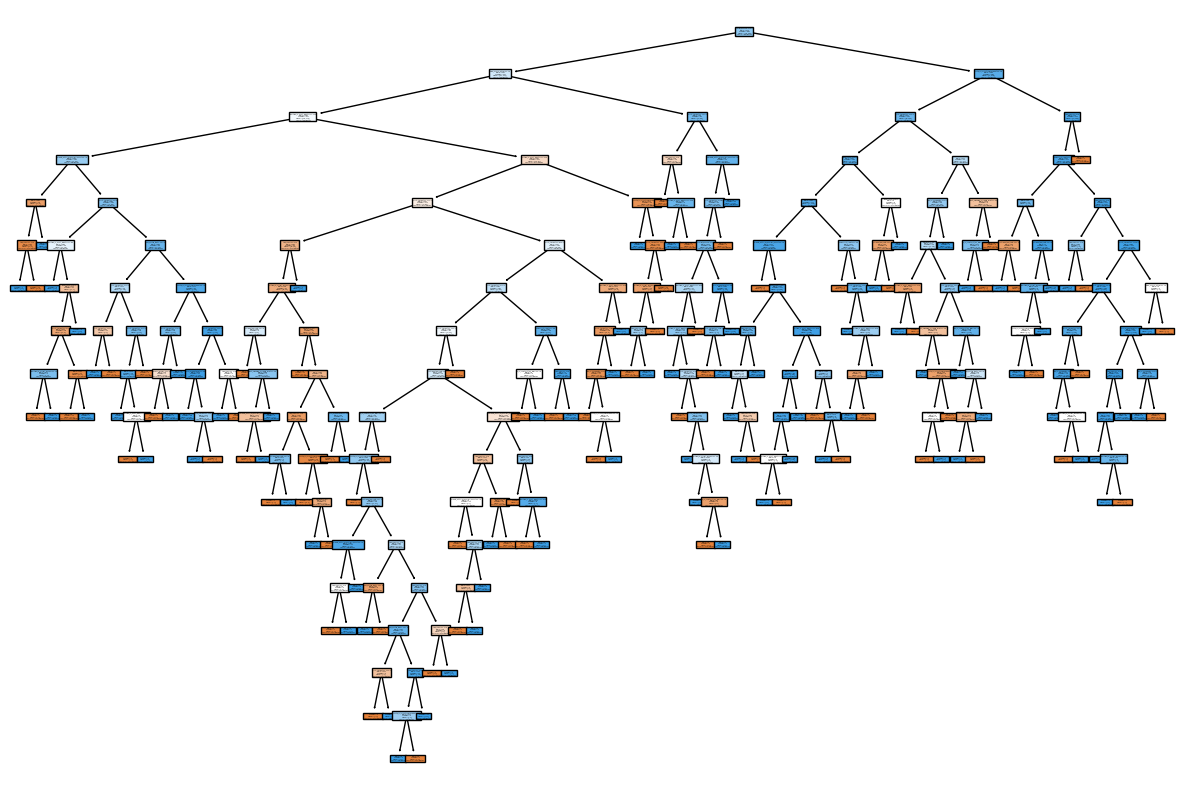

In [9]:
# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=['Non-Creditworthy', 'Creditworthy'])
plt.show()